In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
np.set_printoptions(suppress=True)


/kaggle/input/salary/Salary.csv


In [14]:
#reading dataset through numpy and removing headers
dataset = np.genfromtxt('/kaggle/input/salary/Salary.csv', delimiter=",", dtype=str)
dataset = np.delete(dataset,0,0)

#converting string array to float array
dataset_float = np.zeros([35,2], dtype="float")

for i in range(len(dataset)):
    for j in range(len(dataset[0])):
        dataset_float[i][j] = float(dataset[i][j])

print((type(dataset_float[0][0])))
print((dataset_float[:][:]))


<class 'numpy.float64'>
[[     1.1  39343. ]
 [     1.3  46205. ]
 [     1.5  37731. ]
 [     2.   43525. ]
 [     2.2  39891. ]
 [     2.9  56642. ]
 [     3.   60150. ]
 [     3.2  54445. ]
 [     3.2  64445. ]
 [     3.7  57189. ]
 [     3.9  63218. ]
 [     4.   55794. ]
 [     4.   56957. ]
 [     4.1  57081. ]
 [     4.5  61111. ]
 [     4.9  67938. ]
 [     5.1  66029. ]
 [     5.3  83088. ]
 [     5.9  81363. ]
 [     6.   93940. ]
 [     6.8  91738. ]
 [     7.1  98273. ]
 [     7.9 101302. ]
 [     8.2 113812. ]
 [     8.7 109431. ]
 [     9.  105582. ]
 [     9.5 116969. ]
 [     9.6 112635. ]
 [    10.3 122391. ]
 [    10.5 121872. ]
 [    11.2 127345. ]
 [    11.5 126756. ]
 [    12.3 128765. ]
 [    12.9 135675. ]
 [    13.5 139465. ]]


In [15]:
#seperate training set
x_train = dataset_float[:,0]
y_train = dataset_float[:,1]
print(x_train)
print(y_train)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872. 127345. 126756. 128765. 135675. 139465.]


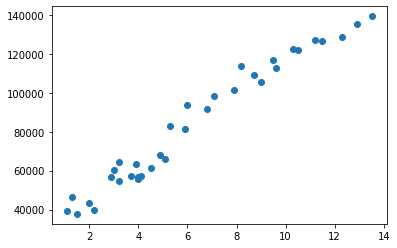

In [16]:
#visualising thr dataset
plt.scatter(x_train,y_train)
plt.show()

In [17]:
#writing Linear Regression code

m = len(dataset)
ep = 10000
w=1100
b=120
alpha = 0.01

# Defining MSE cost function
def j(w,b,x_train,y_train,m):
    j = 0.00
    for i in range(m):
        j += ((w*x_train[i] + b - y_train[i])**2)
    return(j/(2*m))

#defining partial derivative wrt w
def jw(w,b,x_train,y_train,m):
    jw = 0.00
    for i in range(m):
        jw += (w*x_train[i] + b - y_train[i])*x_train[i]
    return(jw/m)

#defining partial derivative wrt b
def jb(w,b,x_train,y_train,m):
    jb = 0.00
    for i in range(m):
        jb += (w*x_train[i] + b - y_train[i])
    return(jb/m)

#optimizing the model
for i in range(ep):
    if (i%200==0):
        print(f"{w}, {b}") 
    wn = w - alpha * jw(w,b,x_train,y_train,m)
    bn = b - alpha * jb(w,b,x_train,y_train,m)
    w=wn
    b=bn 



1100, 120
10783.277646739469, 11859.966635227349
10003.738379366714, 18320.05914593779
9520.4359506833, 22325.217744898964
9220.795833311777, 24808.35484800345
9035.02354124404, 26347.86189134838
8919.847560127633, 27302.33272324303
8848.440212570715, 27894.09004769039
8804.168748714359, 28260.970542447896
8776.721117916675, 28488.43084056792
8759.70400642358, 28629.45274813771
8749.153657444356, 28716.88417498009
8742.61260236409, 28771.090323027747
8738.557248209709, 28804.697306149064
8736.042990629601, 28825.53312192265
8734.484189366261, 28838.451009177923
8733.51775641293, 28846.459901795948
8732.918582756061, 28851.425292784395
8732.547104248579, 28854.50375928957
8732.31679325286, 28856.41236146121
8732.174003956357, 28857.595665630164
8732.085476775397, 28858.32929612531
8732.030591276547, 28858.784135817044
8731.996563106315, 28859.06612947263
8731.975466160971, 28859.24096122815
8731.96238637737, 28859.34935424389
8731.954277111494, 28859.416556256594
8731.949249490624, 2885

In [18]:
print(jw(w,b,x_train,y_train,m)) 
print(jb(w,b,x_train,y_train,m))

3.2874023807900294e-08
-2.7229107217863203e-07


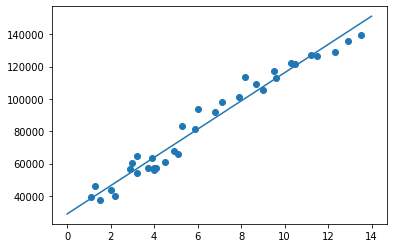

In [19]:
#plotting the best-fit line
plt.scatter(x_train,y_train)

x = np.linspace(0,14)
y = w*x + b
plt.plot(x,y)
plt.show()